# Beginner: Zcut using Astrocut and Astroquery Tutorial

This notebook shows the user how to use the MAST astroquery interface to create a cutout from various Hubble deep field surveys. For this example we will use RA and Dec coordinates to perform a query to determine which surveys contain the target, get the cutouts for this position in the sky, and download the cutouts. 

This tutorial shows users how to do the following: use Zcut in astroquery Zcut to determine number of surveys that contain our target, download and display cutouts both as image and fits files.

### Table of Contents

1. [Import Statements](#Import-Statements)
2. [Set up coordinates](#Set-up-coordinates)
3. [Query Which Surveys are Available](#Query-Which-Surveys-are-Available)
4. [Getting Cutouts](#Getting-Cutouts)
5. [Getting FITS cutouts](#Getting-FITS-cutouts)

## Import Statements

In this tutorial we will use the MAST module of Astroquery to query and download data.
We start with a few import statements.

 - numpy to handle array functions
 - astroquery.mast for the catalogs and for Zcut.
 - astropy.io fits for accessing FITS files
 - PIL for colorizing images

In [1]:
# For manipulating data
import numpy as np

# For querying for data
from astroquery.mast import Zcut, Catalogs

from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.wcs import WCS
import astropy.units as u
from PIL import Image

# For matplotlib plotting
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt

## Set up coordinates

Here we create a SkyCoord object from the RA and Dec for our chosen object.

In [2]:
coord = SkyCoord(189.49206, 62.20615, unit = "deg")

## Query Which Surveys are Available

Here we use the Zcut method `get_surveys()` to find the surveys available for our chosen position in the sky. The function will return a list of the matching surveys. 

In [3]:
survey_list = Zcut.get_surveys(coordinates=coord, radius="2m")
print(survey_list)

['candels_gn_60mas', 'candels_gn_30mas', 'goods_north']


## Getting Cutouts

Here we use the Zcut method `download_cutouts()` which allows users to get cutout file(s) at a particular location. The actual cutout is performed by [Astrocut](https://astrocut.readthedocs.io/en/latest/), which can also be run locally. The cutouts can be returned as FITS or image (png/jpg) files, and the user may also optionally specify the particular survey to cutout using the "survey" parameter.

### FITS cutouts

First, we perform the method with the default FITS option for output.

In [4]:
cutoutlist = Zcut.download_cutouts(coordinates=coord, size=5)
print(cutoutlist)

Inflating...
                              Local Path                             
---------------------------------------------------------------------
./candels_gn_30mas_189.492060_62.206150_5.0pix-x-5.0pix_astrocut.fits


Here we see the fits file that was downloaded.

### Testing with PNG/JPG and Surveys

Next, we look at the output when `download_cutouts()` is passed with a survey and image (jpg) files to be returned.

In [10]:
cutoutlist = Zcut.download_cutouts(coordinates=coord, size=[500,300], cutout_format="jpg", survey='candels_gn_30mas')
print(cutoutlist)

Inflating...
                                                Local Path                                               
---------------------------------------------------------------------------------------------------------
 ./hlsp_candels_hst_acs_gn-tot-30mas_f606w_v1.0_drz_189.492060_62.206150_300.0pix-x-500.0pix_astrocut.jpg
 ./hlsp_candels_hst_acs_gn-tot-30mas_f814w_v1.0_drz_189.492060_62.206150_300.0pix-x-500.0pix_astrocut.jpg
./hlsp_candels_hst_acs_gn-tot-30mas_f850lp_v1.0_drz_189.492060_62.206150_300.0pix-x-500.0pix_astrocut.jpg


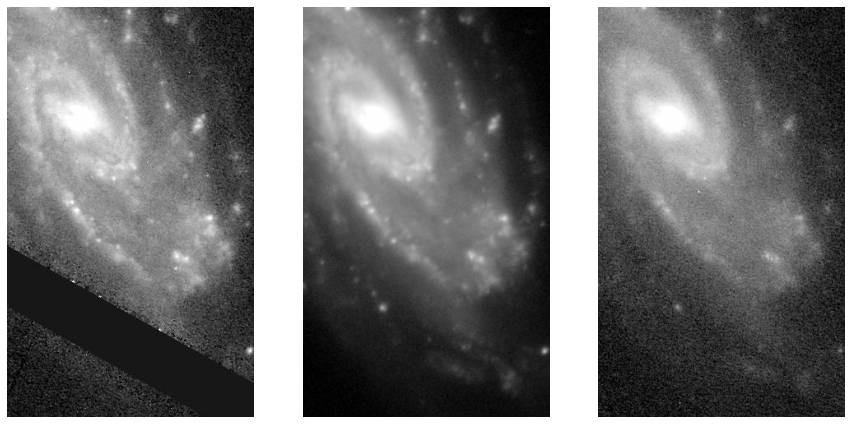

In [11]:
fig, ax = plt.subplots(1,3, figsize=(15,10))
filenames = cutoutlist["Local Path"]
for i,fle in enumerate(filenames):
    image = Image.open(fle)
    ax[i].imshow(image,cmap="gray")
    ax[i].axis('off')

Here we see the three cutouts matched with this survey at this position in the sky. Next, we use the jpg cutouts downloaded and combine them into one colorized image:

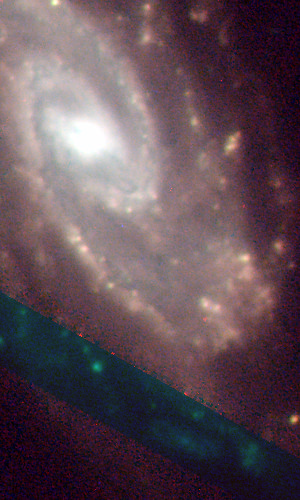

In [17]:
Image.merge("RGB", [Image.open(cutoutlist[0][0]), Image.open(cutoutlist[1][0]), Image.open(cutoutlist[2][0])])

If the user wants to colorize and create images from FITS files, this can be done with built in functions in `astropy.visualization`.

## Getting FITS cutouts

Here, we use the Zcut function `get_cutouts()` to get the cutouts as astropy FITS objects, and use the MAST Catalogs functionality to overlay Gaia catalog sources onto one cutout image.

In [8]:
coord = SkyCoord("53.22706 -27.90232", unit="deg")
cutouts = Zcut.get_cutouts(coord, size=300)

Now, we use one of the cutouts we got from Zcut at this location and get the WCS infomation associated with our cutout. We make a WCS-aware plot and identify a single cutout image to show, and then display the image and sources together. 

We also use the astroquery.mast `Catalogs` class to search the Gaia coordinates to overlay nearby sources onto the image so we can identify sources in the image.

In [9]:
cutout_wcs = WCS(cutouts[0][1].header)
cutout_img = cutouts[0][1].data

sources = Catalogs.query_region(catalog="Gaia", coordinates=coord, radius=.2*u.arcmin)

Next we set up our graph to show the overlayed images.

In [18]:
fig, ax = plt.subplots(subplot_kw={'projection':cutout_wcs})
fig.set_size_inches(10,10)
plt.grid(color='white', ls='solid')
    
# Setup WCS axes.
xcoords = ax.coords[0]
ycoords = ax.coords[1]
xcoords.set_major_formatter('d.ddd')
ycoords.set_major_formatter('d.ddd')
xcoords.set_axislabel("RA (deg)")
ycoords.set_axislabel("Dec (deg)")
ax.imshow(cutout_img, cmap='gray',vmin=0,vmax=1)
ax.plot(sources['ra'],sources['dec'], 'x',ms=20, mew=3, color="#df0040", transform=ax.get_transform('icrs'),)

ax.set_xlim(0,cutout_img.shape[1]-1)
ax.set_ylim(cutout_img.shape[0]-1,0)

plt.show()

NameError: name 'cutout_wcs' is not defined

### About this Notebook

<b>Author:</b> Natalie Korzh, STScI

<b>Updated on:</b> 2021-01-08

[Top of Page](#Beginner:-Zcut-using-Astrocut-and-Astroquery-Tutorial)